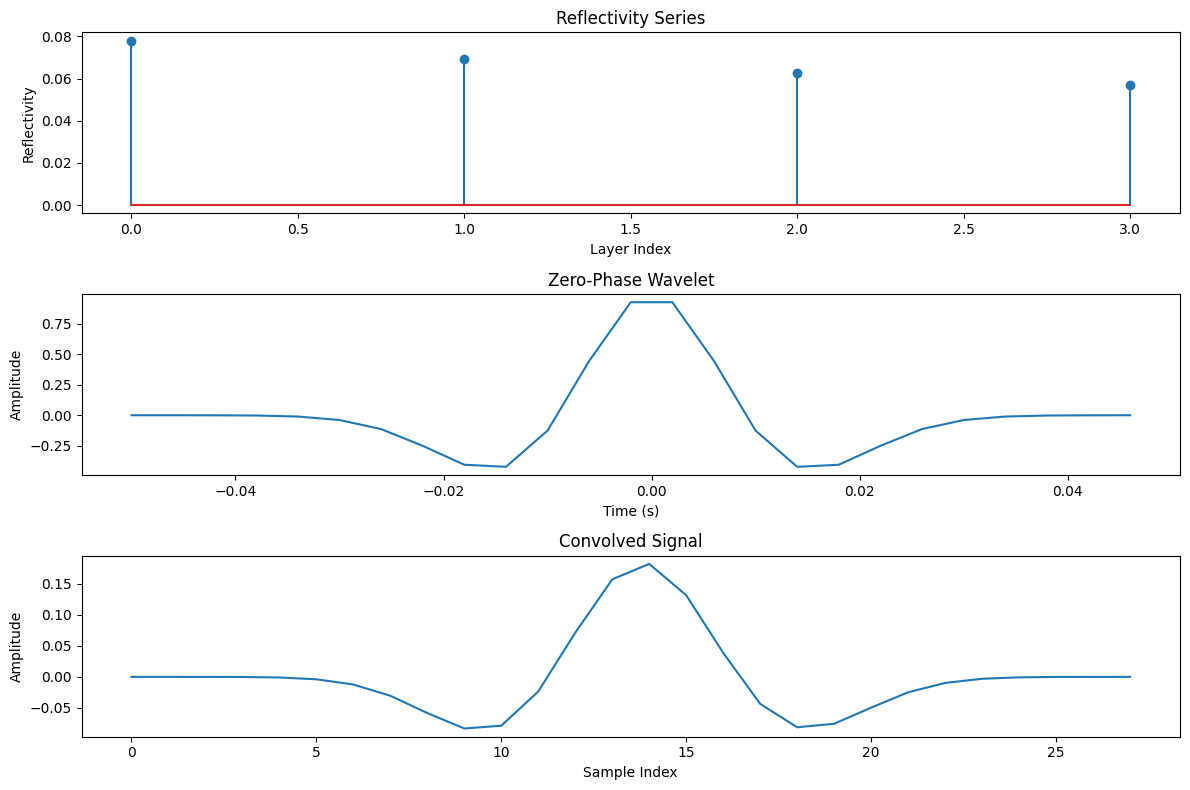

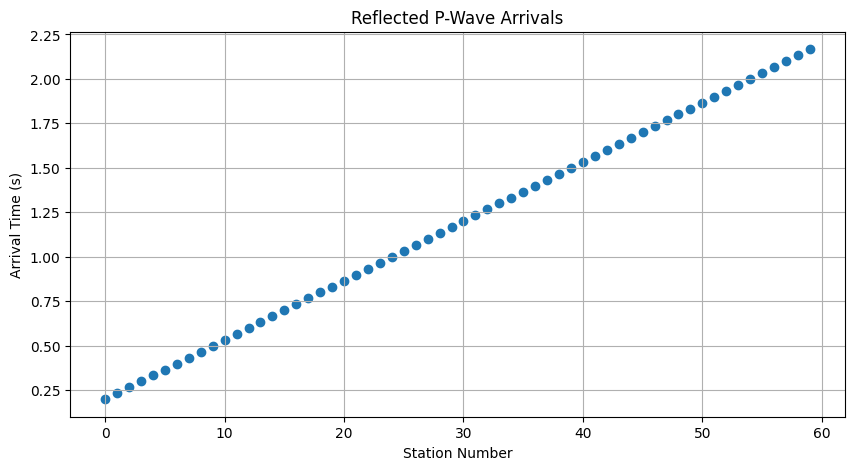

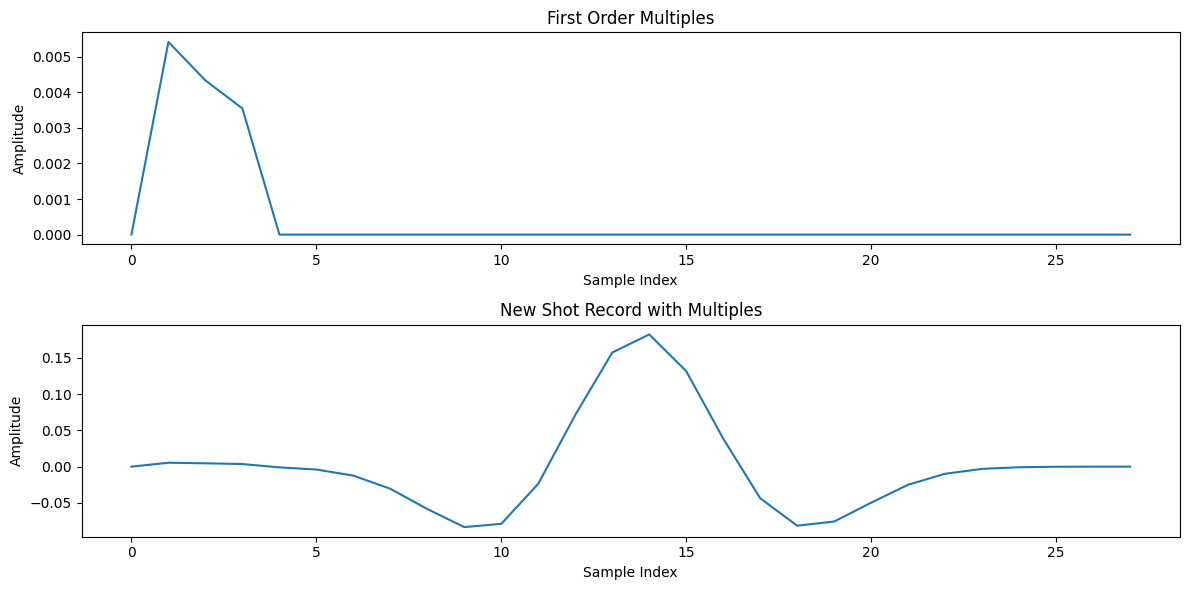

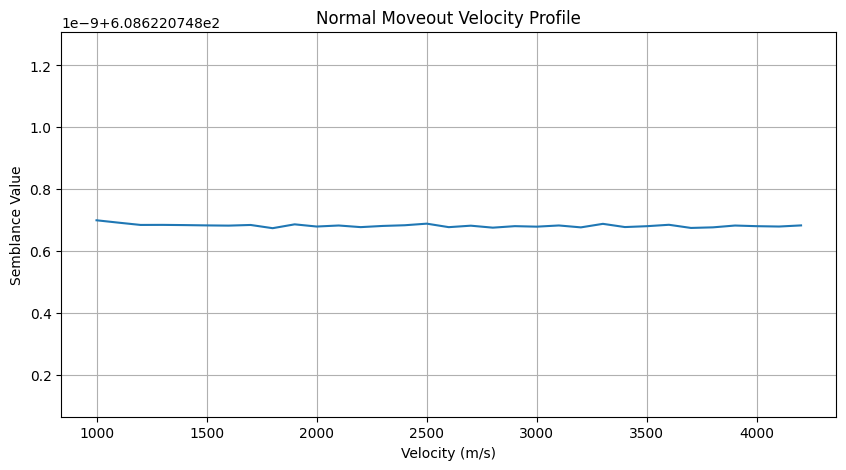

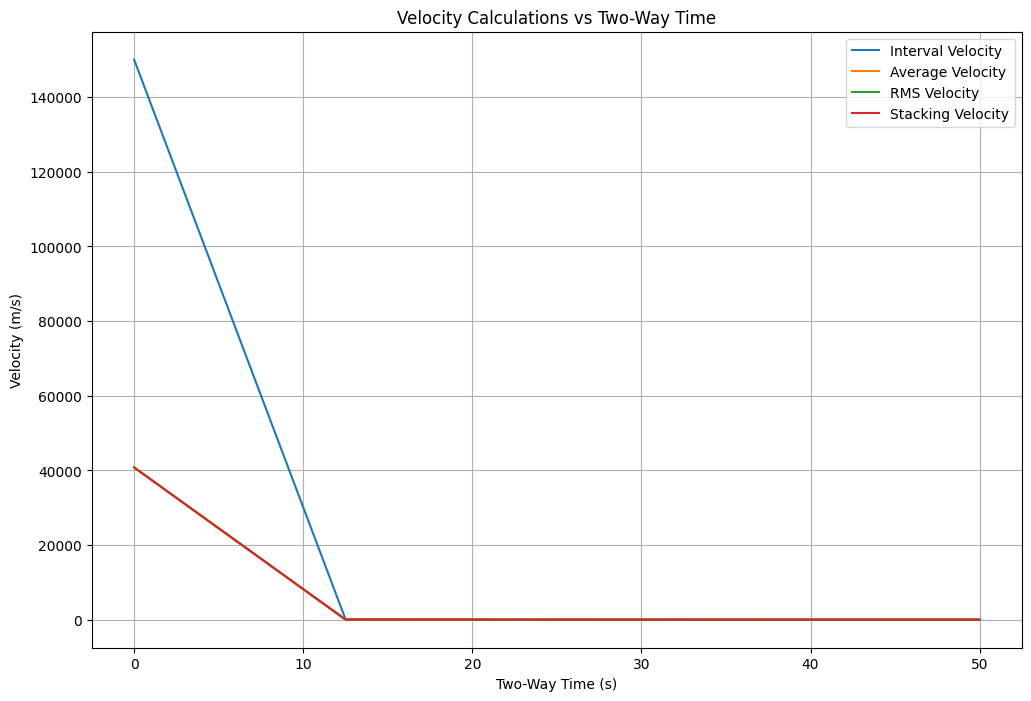

In [1]:
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

# Task 1: Earth Model and Reflectivity Series
num_layers = 5
layer_thickness = np.random.randint(300, 501, size=num_layers)
velocities = np.array([1500 + i * 200 for i in range(num_layers)])
densities = 0.31 * velocities ** 0.25
impedances = densities * velocities

reflectivity = []
for i in range(1, num_layers):
    R = (impedances[i] - impedances[i-1]) / (impedances[i] + impedances[i-1])
    reflectivity.append(R)
reflectivity = np.array(reflectivity)

def ricker_wavelet(frequency, dt, length):
    t = np.arange(-length/2, length/2, dt)
    wavelet = (1 - 2 * (np.pi * frequency * t) ** 2) * np.exp(-(np.pi * frequency * t) ** 2)
    return wavelet

wavelet_frequency = 25
sampling_interval = 0.004
wavelet_length = 0.1
wavelet = ricker_wavelet(wavelet_frequency, sampling_interval, wavelet_length)

convolved_signal = scipy.signal.convolve(reflectivity, wavelet, mode='full')

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.title('Reflectivity Series')
plt.stem(reflectivity)
plt.xlabel('Layer Index')
plt.ylabel('Reflectivity')

plt.subplot(3, 1, 2)
plt.title('Zero-Phase Wavelet')
plt.plot(np.arange(-wavelet_length/2, wavelet_length/2, sampling_interval), wavelet)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.title('Convolved Signal')
plt.plot(convolved_signal)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Task 1c: Split Spread Survey
num_stations = 60
near_offset = 150
trace_interval = 25

arrival_times = []
for i in range(num_stations):
    offset = near_offset + i * trace_interval
    arrival_time = offset / velocities[0] * 2
    arrival_times.append(arrival_time)

plt.figure(figsize=(10, 5))
plt.title('Reflected P-Wave Arrivals')
plt.scatter(np.arange(num_stations), arrival_times)
plt.xlabel('Station Number')
plt.ylabel('Arrival Time (s)')
plt.grid()
plt.show()

# Task 1d: Calculate Multiples
def calculate_multiples(reflectivity, num_samples):
    first_order_multiples = np.zeros(num_samples)
    second_order_multiples = np.zeros(num_samples)
    third_order_multiples = np.zeros(num_samples)

    for i in range(1, len(reflectivity)):
        first_order_multiples[i] += reflectivity[i-1] * reflectivity[i]
    for i in range(2, len(reflectivity)):
        second_order_multiples[i] += reflectivity[i-2] * reflectivity[i-1] * reflectivity[i]
    for i in range(3, len(reflectivity)):
        third_order_multiples[i] += reflectivity[i-3] * reflectivity[i-2] * reflectivity[i-1] * reflectivity[i]

    return first_order_multiples[:num_samples], second_order_multiples[:num_samples], third_order_multiples[:num_samples]

num_samples = len(convolved_signal)
first_order, second_order, third_order = calculate_multiples(reflectivity, num_samples)
new_shot_record = convolved_signal + first_order + second_order + third_order

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('First Order Multiples')
plt.plot(first_order)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title('New Shot Record with Multiples')
plt.plot(new_shot_record)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Task 2: Normal-Moveout Velocity Profile
def semblance(data):
    max_velocity = np.max(velocities) + 1000
    v_steps = np.arange(1000, max_velocity + 1000, 100)
    semblance_values = []

    for v in v_steps:
        nmo_corrected_data = data / np.sqrt(1 - (near_offset / v) ** 2)
        semblance_value = np.sum(nmo_corrected_data ** 2) / (np.sum(nmo_corrected_data) ** 2 + np.finfo(float).eps)
        semblance_values.append(semblance_value)

    return v_steps, semblance_values

nmo_velocities, semblance_results = semblance(new_shot_record)

plt.figure(figsize=(10, 5))
plt.title('Normal Moveout Velocity Profile')
plt.plot(nmo_velocities, semblance_results)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Semblance Value')
plt.grid()
plt.show()

# Task 3: Velocity Calculations
two_way_time = np.linspace(0.01, wavelet_length * 1000 / 2, num_layers)
interval_velocity = velocities / two_way_time
average_velocity = np.cumsum(layer_thickness) / two_way_time
rms_velocity = np.sqrt(np.cumsum(layer_thickness ** 2)) / two_way_time
stacking_velocity = average_velocity

plt.figure(figsize=(12, 8))
plt.plot(two_way_time, interval_velocity, label='Interval Velocity')
plt.plot(two_way_time, average_velocity, label='Average Velocity')
plt.plot(two_way_time, rms_velocity, label='RMS Velocity')
plt.plot(two_way_time, stacking_velocity, label='Stacking Velocity')

plt.title("Velocity Calculations vs Two-Way Time")
plt.xlabel("Two-Way Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

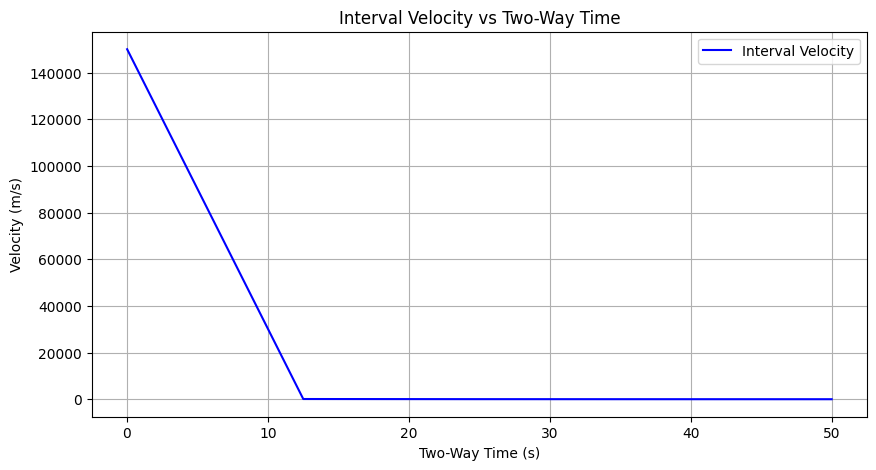

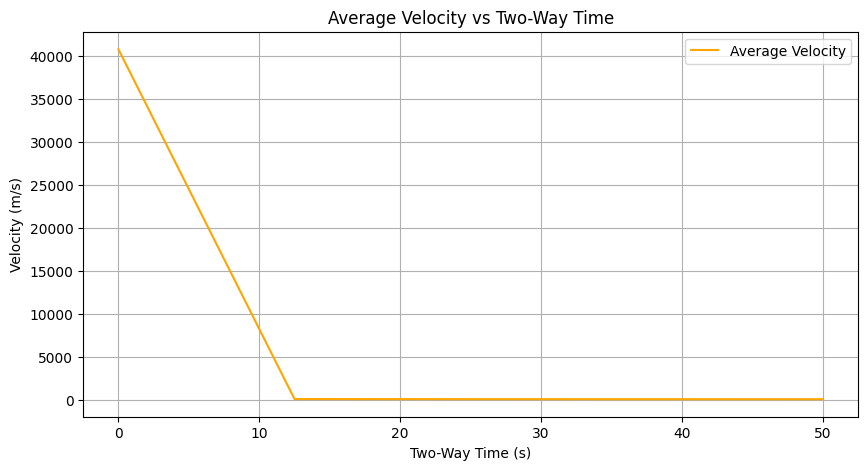

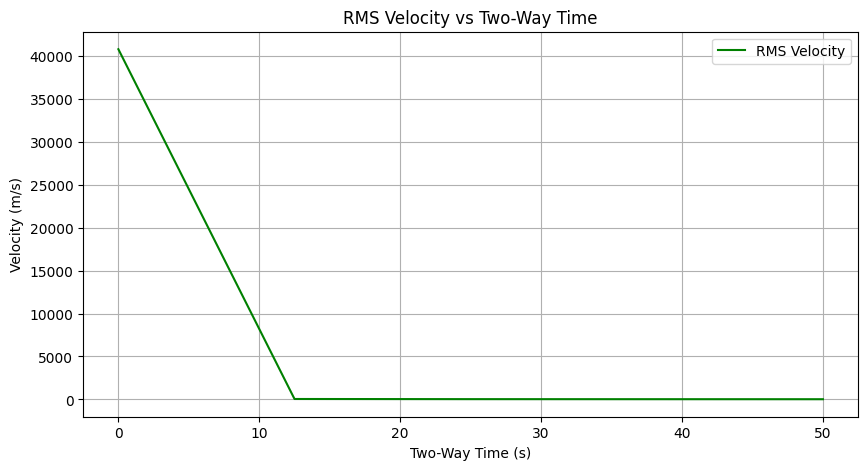

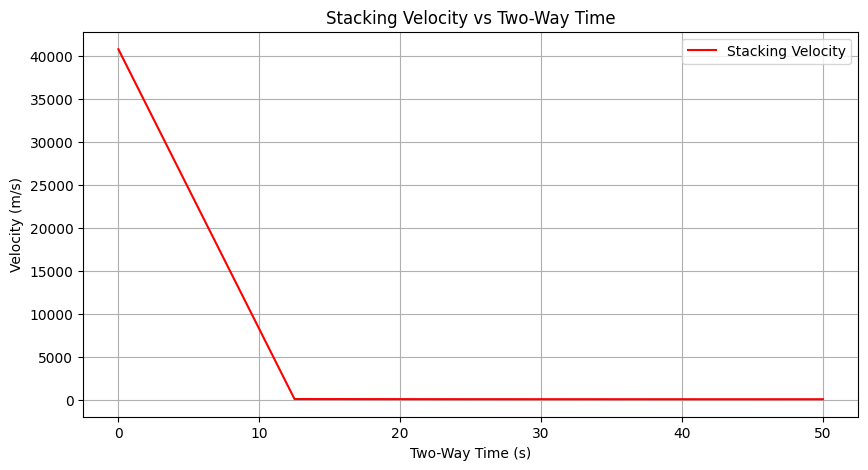

In [3]:
# Plotting each type of velocity separately

# Interval Velocity Plot
plt.figure(figsize=(10,5))
plt.plot(two_way_time , interval_velocity , label='Interval Velocity', color='blue')
plt.title("Interval Velocity vs Two-Way Time")
plt.xlabel("Two-Way Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

# Average Velocity Plot
plt.figure(figsize=(10,5))
plt.plot(two_way_time , average_velocity , label='Average Velocity', color='orange')
plt.title("Average Velocity vs Two-Way Time")
plt.xlabel("Two-Way Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

# RMS Velocity Plot
plt.figure(figsize=(10,5))
plt.plot(two_way_time , rms_velocity , label='RMS Velocity', color='green')
plt.title("RMS Velocity vs Two-Way Time")
plt.xlabel("Two-Way Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

# Stacking Velocity Plot
plt.figure(figsize=(10,5))
plt.plot(two_way_time , stacking_velocity , label='Stacking Velocity', color='red')
plt.title("Stacking Velocity vs Two-Way Time")
plt.xlabel("Two-Way Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()